# DBSCan - clustering to identify outliers

DBSCan is a clustering algorithm that is good for handling data in awkward shapes with high density and low density observations, for example. Its challenge is to find the appropriate value for its parameters.

I used the famous iris dataset available at sklearn.

## Exploring Data

In [477]:
# import necessary libraries

import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [478]:
# Download data set and turn into dataframe

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [479]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [480]:
# Check if there are any missing values

df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

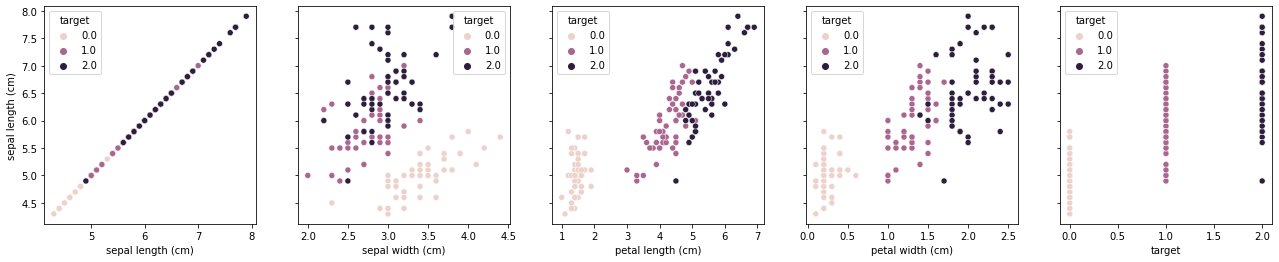

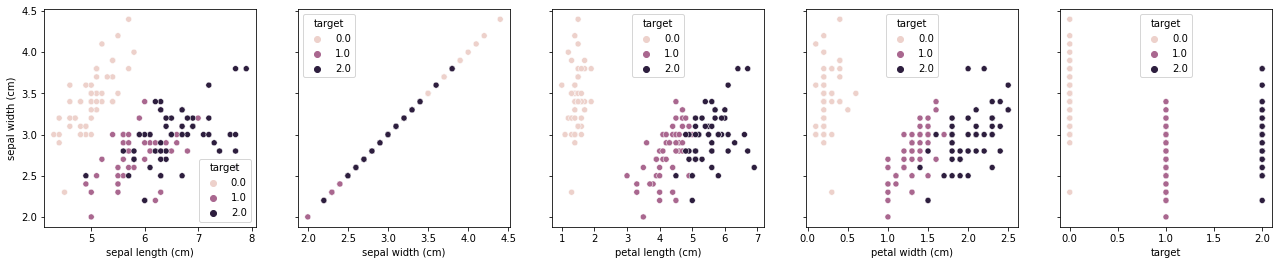

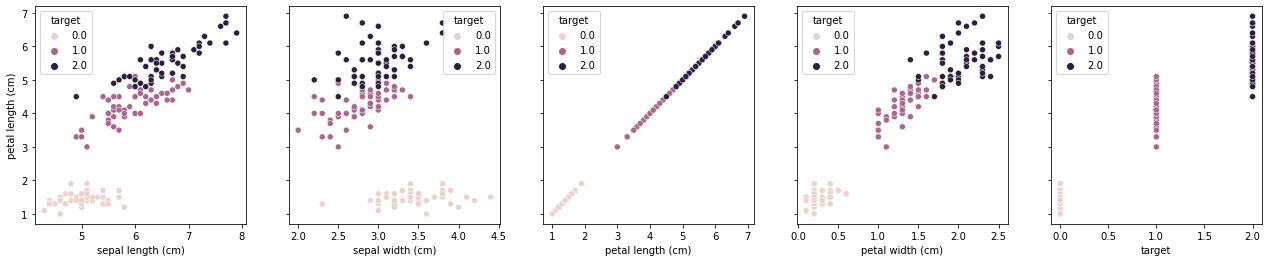

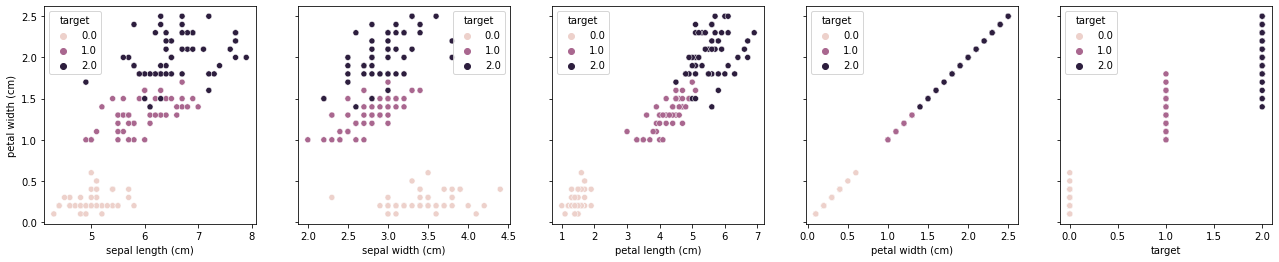

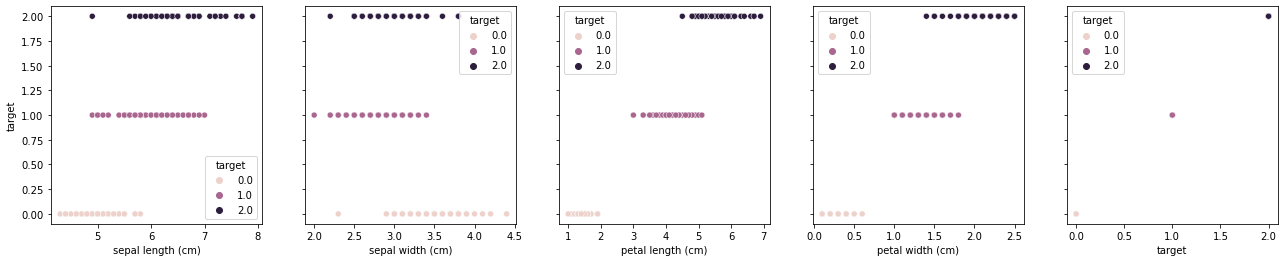

In [481]:
# Pairplots

for column in df: 
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize = (22,4))
    number = 1
    for column2 in df: 
        ax_val = 'ax' + str(number)
        sns.scatterplot(df[column2], df[column], hue= df['target'], ax = eval(ax_val))
        number += 1

## Standardize variables

In [482]:
from sklearn.preprocessing import scale

# Remove "target"

df = df.drop(['target'], axis = 1)
#Scalling the data
X = scale(df)

Note: DBSCan is an unsupervised machine learning technique; therefore, training and test set is not used

## Building the model

In [483]:
from pylab import rcParams

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [484]:
# You can use the elbow method to determine te eps value

from sklearn.neighbors import NearestNeighbors

mins = 3 # third nearest neighbor
nn = NearestNeighbors(mins + 1)
nn.fit(X)
distances, neighbors = nn.kneighbors(X)
distances

array([[0.        , 0.13163218, 0.13383627, 0.18772101],
       [0.        , 0.16614339, 0.17890971, 0.17890971],
       [0.        , 0.13383627, 0.17051228, 0.28389113],
       [0.        , 0.23710977, 0.24891184, 0.2662756 ],
       [0.        , 0.17890971, 0.26013882, 0.27119749],
       [0.        , 0.22734971, 0.44502517, 0.44994717],
       [0.        , 0.29828781, 0.39599996, 0.47884156],
       [0.        , 0.12116787, 0.23710977, 0.24891184],
       [0.        , 0.23710977, 0.33774794, 0.52337301],
       [0.        , 0.13163218, 0.18772101, 0.2662756 ],
       [0.        , 0.12116787, 0.43399991, 0.44882402],
       [0.        , 0.17051228, 0.24891184, 0.29828781],
       [0.        , 0.17890971, 0.26326437, 0.2662756 ],
       [0.        , 0.21196853, 0.33774794, 0.50412335],
       [0.        , 0.56985368, 0.59751071, 0.6003629 ],
       [0.        , 0.58585616, 0.98026172, 0.99994978],
       [0.        , 0.22734971, 0.46408451, 0.50412335],
       [0.        , 0.13163218,

In [485]:
# sort the distances

distances = np.sort(distances[:, mins], axis = 0)

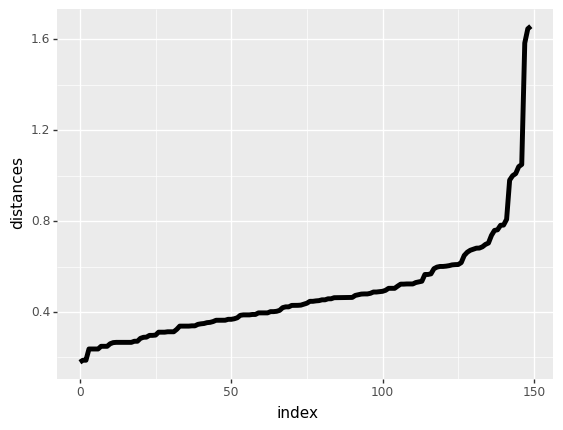

In [486]:
# plot distances


from plotnine import ggplot, aes, geom_line

distances_df = pd.DataFrame({"distances": distances, "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x ="index", y="distances")) + geom_line(color = "black", size = 2))
print(plt)

The elbow is around 0.8

In [487]:
# Run model, eps (the distance between two points) and min_samples (the number of samples for a point to be considered core)

model = DBSCAN(eps=0.8,  min_samples=4).fit(X)
print(model)   

DBSCAN(eps=0.8, min_samples=4)


In [488]:
# Visualize results

outliers_df = pd.DataFrame(df)
print(Counter(model.labels_))
print(outliers_df[model.labels_ ==-1])

Counter({1: 97, 0: 49, -1: 4})
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
41                 4.5               2.3                1.3               0.3
109                7.2               3.6                6.1               2.5
117                7.7               3.8                6.7               2.2
131                7.9               3.8                6.4               2.0


In [489]:
# Check number of clusters generated

cluster = model.labels_
len(set(cluster))

3

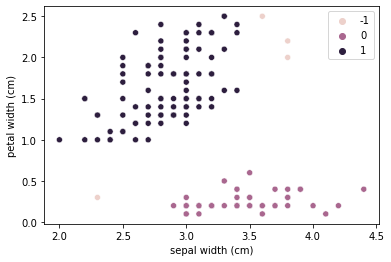

In [490]:
# Plot clusters and noise (I selected two variables to exemplify)

sns.scatterplot(df['sepal width (cm)'], df['petal width (cm)'], hue=cluster)

The -1 values are outliers and the other two groups are the two clusters found (one of the clusters found are the outliers; hence the number of clursters = 3)

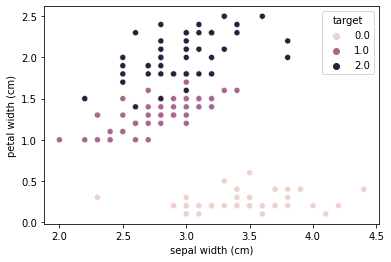

In [491]:
# Compare results with original classification (i.e., target variable)

iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

sns.scatterplot(df['sepal width (cm)'], df['petal width (cm)'], hue= df['target'])

In [492]:
# Generate silhouette score to check model performance (closer to 1 better)

from sklearn.metrics import silhouette_score

# overall
print(silhouette_score(X, cluster))

0.5216965052515835


The silhouette score is relatively low, suggesting poor model performance. Because the clusters are not neatly separated, DBSCan might not be the best algorithm for these data.